# ASL ML Workshop - Review of Day 3
- Introduction to scikit learn https://scikit-learn.org/
- Prep data with pandas
- Building logistic regression model using scikit learn
- Predicting with logistic regression model
- Scoring the model
- Model evaluation (evaluation metrics)
- Train - test split
- Build the model with splitted dataset
- ROC foundation (specificity & sensitivity)
- Adjusting the threshold for logistic regression
- The ROC curve
- Area under curve
- Comparision of two models

# What is Jupyter notebook?
Jupyter Notebook is an interactive computing environment that allows users to create and share documents that contain live code, equations, visualizations, and narrative text. It is an open-source web application that supports over 100 programming languages, including Python, R, and Julia.

# Scikit Learn

Scikit-learn is a popular Python library for machine learning that provides a range of tools for various tasks such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. It is built on top of NumPy, SciPy, and matplotlib, which are also popular scientific computing libraries in Python.

In [91]:
# pip install scikit-learn

# Prep data with pandas

Prepare the training data with pandas

In [92]:
import pandas as pd

df = pd.read_csv('titanic.csv')

In [93]:

df # our dataset

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [94]:
# create a new feature column

df['Male'] = df['Sex'] == 'male'

In [95]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,True
883,1,1,female,19.0,0,0,30.0000,False
884,0,3,female,7.0,1,2,23.4500,False
885,1,1,male,26.0,0,0,30.0000,True


In [96]:
# create numpy array for training

X = df[['Pclass','Male','Age','Siblings/Spouses','Parents/Children','Fare']].values

y = df['Survived'].values

print(X.shape)

(887, 6)


# Building logistic regression model

Logistic regression is a popular statistical model used for binary classification problems, where the goal is to predict a binary outcome (e.g., yes/no, 0/1) based on a set of input features. It is a type of linear model that uses a logistic function to model the probability of the binary outcome.

In [97]:
from sklearn.linear_model import LogisticRegression as LgR

model = LgR() # create an instance of LogisticRegression 

In [98]:
model

LogisticRegression()

# Training the model with our dataset
Training the model with titanic dataset

In [99]:
model.fit(X,y) # passing the feature array X and the target y

# now the model will find the best parameters for our classification dataset

LogisticRegression()

In [100]:
print(model.coef_,model.intercept_)

[[-1.13645864 -2.64409952 -0.04237386 -0.38746665 -0.09619815  0.00297182]] [5.08857693]


# Predicting with logistic regression model
Making prediction with the trained model

In [101]:
# prediction for a random person
print(model.predict([[3,True,22,0,1,7.25]]))

[0]


In [102]:
# prediction for first 5 entry in the dataset
print(model.predict(X[:5]))

[0 1 1 1 0]


In [103]:
# actual survival data \
# for first 5 entry in the dataset
print(y[:5])

[0 1 1 1 0]


# Scoring the model
Scoring the trained model

In [104]:
y_pred = model.predict(X)

In [105]:
print(y_pred)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 

In [106]:
(y == y_pred).sum() # number of correct predictions

714

In [107]:
# score
print((y == y_pred).sum()/y.shape[0])

0.8049605411499436


In [108]:
print(model.score(X,y))

0.8049605411499436


# Model evaluation
Evaluation metrics
- Accuracy
- Precision
- Recall
- F1 score

In [109]:
# necessary imports
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cfm

In [110]:
# accuracy score
print("Accuracy :",acc(y,y_pred))

Accuracy : 0.8049605411499436


# Confusion Matrix

A 2 x 2 matrix
- 0th row actually positive
- 1st row actually negative
- 0th column predicted positive
- 0th column predicted negative
- (0,0) => True positives, TP
- (0,1) => False positives, FP
- (1,0) => False negatives, FN
- (1,1) => True negatives, TN


In [111]:
print("Confusion matrix :\n",cfm(y,y_pred))
# this will produce the matrix in reverse order \
# this is because 0 correspond to negative and 1 correspond to positive

Confusion matrix :
 [[475  70]
 [103 239]]


In [112]:
# precission = TP / (TP + FP)
print("Precision :",prec(y,y_pred))

Precision : 0.7734627831715211


In [113]:
# recall = TP / (TP + FN)
print("Recall :",rec(y,y_pred))

Recall : 0.6988304093567251


In [114]:
# f1 score = 2 * precision * recall / (precision + recall)
print("F1 score :",f1(y,y_pred))

F1 score : 0.7342549923195083


# Train - test split
Use separate data for traing and testing purpose

In [115]:
# necessary imports
from sklearn.model_selection import train_test_split as split

In [116]:
# split the dataset
X_train,X_test,y_train,y_test = split(X,y,train_size=0.8)

In [117]:
print("Full dataset :",X.shape,y.shape)

Full dataset : (887, 6) (887,)


In [118]:
print("Training dataset: ",X_train.shape,y_train.shape)

Training dataset:  (709, 6) (709,)


In [119]:
print("Training dataset: ",X_test.shape,y_test.shape)

Training dataset:  (178, 6) (178,)


# Rebuild the model with splitted dataset
This will provide more accurate evaluation

In [120]:
model_new = LgR()

In [121]:
model_new.fit(X_train,y_train)
y_pred = model_new.predict(X_test)

In [122]:
# accuracy score
print("Accuracy :",acc(y_test,y_pred))

Accuracy : 0.8146067415730337


In [123]:
# precision score
print("Precision :",prec(y_test,y_pred))

Precision : 0.8181818181818182


In [124]:
# recall score
print("Recall score :",rec(y_test,y_pred))

Recall score : 0.72


In [125]:
# f1 score
print("F1 score :",f1(y_test,y_pred))

F1 score : 0.7659574468085107


# Specificity & Sensitivity
Foundation of ROC (Reciever Operating Characteristic) curve

In [126]:
# necessary imports
from sklearn.metrics import precision_recall_fscore_support as prfs

In [127]:
sensitivity = rec # sensitivity is another term for recall

In [128]:
# specificity = TN / (TN + FN) \
# that is also the recall of the negative class

def specificity(y,y_pred):
    p,r,f,s = prfs(y,y_pred)
    return r[0] # r[0] is the recall of the negative class here

In [129]:
print(sensitivity(y_test,y_pred))

0.72


In [130]:
print(specificity(y_test,y_pred))

0.883495145631068


# Adjusting the threshold
Tweeking the default threshold values can be beneficial to boost precision or recall

model.predict_proba(X_test)

The result is a numpy array with 2 values for each datapoint i.e., the first value is the probability that the datapoint is in the 0 class and the second value is the probality of the datapoint being in the 1 class.

In [131]:
print(model_new.predict_proba(X_test))

[[0.33531197 0.66468803]
 [0.29779379 0.70220621]
 [0.8625028  0.1374972 ]
 [0.07929636 0.92070364]
 [0.1596427  0.8403573 ]
 [0.5866875  0.4133125 ]
 [0.38062753 0.61937247]
 [0.8783454  0.1216546 ]
 [0.84264524 0.15735476]
 [0.18596972 0.81403028]
 [0.22320887 0.77679113]
 [0.89863581 0.10136419]
 [0.20741628 0.79258372]
 [0.33458132 0.66541868]
 [0.38775136 0.61224864]
 [0.28285265 0.71714735]
 [0.28388639 0.71611361]
 [0.75061624 0.24938376]
 [0.27672244 0.72327756]
 [0.85943386 0.14056614]
 [0.8264985  0.1735015 ]
 [0.20704335 0.79295665]
 [0.18235186 0.81764814]
 [0.85576177 0.14423823]
 [0.90809008 0.09190992]
 [0.89223796 0.10776204]
 [0.96552336 0.03447664]
 [0.42765537 0.57234463]
 [0.02771683 0.97228317]
 [0.94898594 0.05101406]
 [0.89264868 0.10735132]
 [0.68868919 0.31131081]
 [0.77345748 0.22654252]
 [0.77739503 0.22260497]
 [0.03090576 0.96909424]
 [0.10842724 0.89157276]
 [0.44816026 0.55183974]
 [0.88020145 0.11979855]
 [0.20983577 0.79016423]
 [0.61754784 0.38245216]


In [132]:
threshold = 0.75
# set the new threshold \
# default is 0.5

In [133]:
y_pred = model_new.predict_proba(X_test)[:,1] > threshold

In [134]:
print((y_test == y_pred).sum())

129


In [135]:
print("Precision :",prec(y_test,y_pred))

Precision : 0.9642857142857143


# ROC curve
Graphical evaluation of models

In [136]:
# imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

In [137]:
# obtain specificity and sensitivity for every possible threshold
fpr,tpr,thresholds = roc(y_test,model_new.predict_proba(X_test)[:,1])

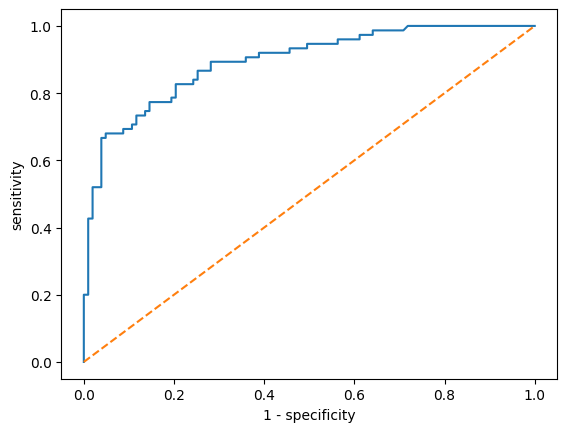

In [138]:
plt.ylabel('sensitivity')
plt.xlabel('1 - specificity')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle = '--')
plt.show()

# Area under curve
Numeric measure of the area covered by the curve. Maximum is 1.

In [139]:
y_pred_proba = model_new.predict_proba(X_test)

In [140]:
# auc score
print(auc(y_test,y_pred_proba[:,1]))

0.8936569579288026


Comparision of 2 different models

In [141]:
model2 = LgR()
# creating a new model with fewer features
model2.fit(X_train[:,0:2],y_train)
y_pred_proba2 = model2.predict_proba(X_test[:,0:2])

In [142]:
print(auc(y_test,y_pred_proba2[:,1]))

0.8537864077669903


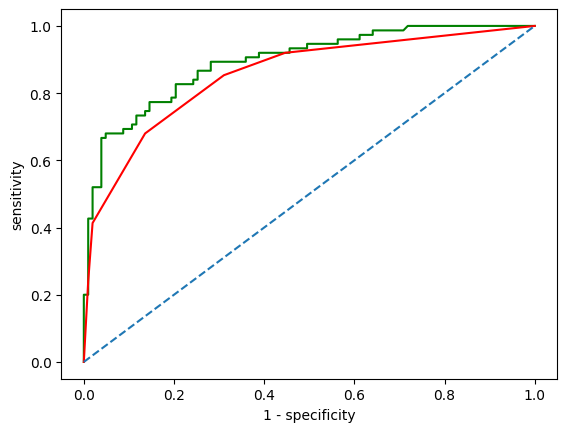

In [143]:
fpr2,tpr2,thresholds2 = roc(y_test,y_pred_proba2[:,1])
plt.ylabel('sensitivity')
plt.xlabel('1 - specificity')
plt.plot(fpr,tpr,color = 'green')
plt.plot(fpr2,tpr2,color = 'red')
plt.plot([0,1],[0,1],linestyle = '--')
plt.show()

# K-Fold cross validation
Instead of doing a single train/test split, we'll split our data into a training set and test set multiple times

In [144]:
# necessary imports
from sklearn.model_selection import KFold as kf

In [145]:
# we're doing 3 splits
kfold = kf(n_splits = 3,shuffle = True)

In [146]:
# using a smaller dataset
X_small = df[['Age','Fare']].values[:6]
y_small = df['Survived'].values[:6]

In [147]:
for train,test in kfold.split(X_small):
    print(train,test)

[1 2 3 4] [0 5]
[0 2 4 5] [1 3]
[0 1 3 5] [2 4]


In [148]:
# now take the full dataset
splits = list(kfold.split(X))

In [149]:
first_split = splits[0]

In [150]:
print("Test datapoints :",first_split[1].shape)

Test datapoints : (296,)


In [151]:
train_indices,test_indices = first_split
print("Test set indices :\n",test_indices)

Test set indices :
 [  1   8  12  15  18  19  22  27  28  31  32  34  38  40  41  42  43  44
  45  47  49  51  59  60  62  63  66  81  83  87  96  98  99 100 110 112
 115 119 120 121 122 123 124 127 130 131 139 143 144 150 157 158 159 160
 161 162 163 181 182 186 188 190 195 206 212 213 216 217 220 222 224 226
 228 230 239 242 243 244 246 249 250 254 255 256 257 262 263 265 267 268
 283 285 288 289 291 294 295 296 299 302 305 307 308 309 311 317 319 322
 323 327 328 333 335 337 340 341 343 345 348 350 356 362 364 365 366 367
 372 380 381 385 387 388 392 394 396 403 404 406 414 416 417 434 435 437
 447 452 453 454 460 466 468 471 472 473 478 480 481 486 487 489 494 496
 497 498 503 504 505 506 507 514 516 524 526 531 541 545 546 547 553 554
 556 559 562 564 565 566 576 577 581 583 587 589 590 591 592 595 596 603
 608 610 612 613 615 622 627 628 638 645 646 647 651 652 653 657 661 664
 665 666 668 669 672 678 682 683 684 693 695 696 702 703 704 706 709 711
 713 714 716 720 726 731 732 73

Let's do 3 fold cross validation

In [152]:
scores = []
for train_index,test_index in splits:
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    model = LgR()
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

In [153]:
print(scores)

[0.793918918918919, 0.8209459459459459, 0.7932203389830509]


In [154]:
import numpy as np
print(np.mean(scores))

0.8026950679493052


Model finalization

In [155]:
final_model = LgR()
final_model.fit(X,y)
print(final_model.score(X,y))

0.8049605411499436
